In [39]:
using NBInclude
using Plots 

@nbinclude("Krusell_Smith_Functions_Final.ipynb")  

plot_Fig1 (generic function with 1 method)

In [40]:
# instance of KSParameter
ksp = KSParameter()
# instance of KSSolution
kss = KSSolution(ksp, load_value=false, load_B=false)

if size(kss.k_opt,1) != length(ksp.k_grid)
    error("loaded data is inconsistent with k_size")
end

if size(kss.k_opt,2) != length(ksp.K_grid)
    error("loaded data is inconsistent with K_size")
end

Draw shocks for stochastic simulation of aggregate law of motion

In [41]:
Random.seed!(0)
#  Generate the aggregate and individual shocks 
zi_shocks, epsi_shocks = generate_shocks(ksp;);

In [42]:
# find ALM coefficient 
sm = Stochastic(epsi_shocks)
T_discard = 100
@time K_ts = find_ALM_coef!(EulerMethod(),
            sm, ksp, kss, zi_shocks, 
            tol_ump = 1e-1, max_iter_ump = 10000,
            tol_B = 1e-1, max_iter_B = 500, update_B = 0.3,
            T_discard = T_discard);

 --- Iteration over ALM coefficient: 1 ---


 --- Difference of ALM coefficients is 0.2747656989383496 ---

 --- Iteration over ALM coefficient: 2 ---


 --- Difference of ALM coefficients is 0.1477162305089168 ---

 --- Iteration over ALM coefficient: 3 ---


 --- Difference of ALM coefficients is 0.0812825055465708 ---

-----------------------------------------------------
ALM coefficient successfully converged : dif = 0.0812825055465708
-----------------------------------------------------
224.707562 seconds (1.42 G allocations: 367.235 GiB, 13.92% gc time, 0.20% compilation time)


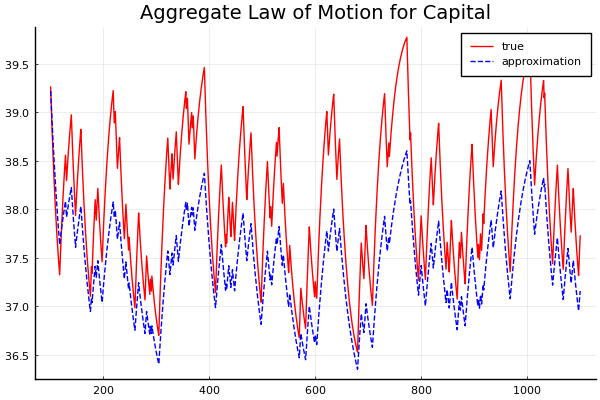

In [38]:
plot_ALM(ksp.z_grid, zi_shocks, kss.B ,K_ts, T_discard = T_discard)

In [23]:
println("Approximated Aggregate Capital Law of Motion by the Agents")
println("The regression log(K_{t+1})= $(round(kss.B[1], digits=4)) + $(round(kss.B[2], digits=4)) log(K_{t}) in good times (R2 = $(round(kss.R2[1], digits=10)))")
println("The regression log(K_{t+1})= $(round(kss.B[3], digits=4)) + $(round(kss.B[4], digits=4)) log(K_{t}) in bad times (R2 = $(round(kss.R2[2], digits=10)))")

Approximated Aggregate Capital Law of Motion by the Agents
The regression log(K_{t+1})= 0.1267 + 0.9654 log(K_{t}) in good times (R2 = 0.9999996245)
The regression log(K_{t+1})= 0.1195 + 0.9666 log(K_{t}) in bad times (R2 = 0.9999993794)


In [26]:
# Compute Mean of Capital Implied By Regression
mc = MarkovChain(ksp.transmat.Pz)
sd = stationary_distributions(mc)[1] # 

# Stationary Distribution with K_{t+1} = K_{t} = K_{ss}
# From the regression K_{t+1} =  kss.B[1] +  kss.B[2] K_{t}
logKg = kss.B[1]/(1-kss.B[2])
logKb = kss.B[3]/(1-kss.B[4])

meanK_reg = exp(sd[1] * logKg + sd[2] * logKb)

println("Mean of Capital implied by regression is $meanK_reg")

Mean of Capital implied by regression is 37.33772672211107


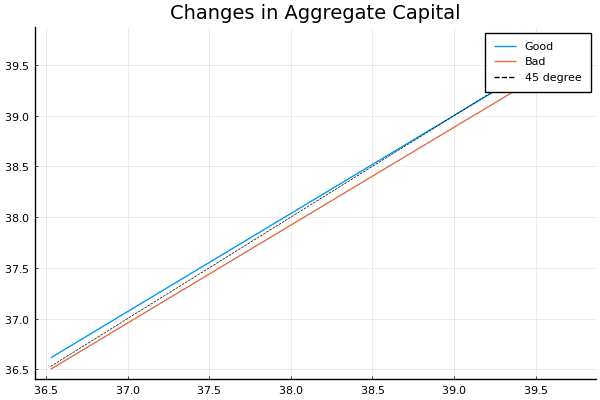

In [27]:
plot_Fig1(ksp ,kss, K_ts)